# Wave data analysis
From the raw data feed, get the following:
 - [f] get frequency data as collection (1/seconds) measure of cycles per second
 - [E] get wave energy data as E (meters squared per second)

Perform the following calculations:
  1. [df] Average of frequency pairs comparing each frequency with the one after it
  2. [Emid] calculate the Energy mid-point
  3. [fmid] calculate the frequency mid-point
  4. [SWF] Significant wave height integrating across the entire range of frequencies (as a function of wave periods)
  5. [p] define the arbitrary period second intervals (p = [0,5,7,9,11,13,15,17,19,21,35])
  6. [Pmid] calculate the mid-point (between frequencies) Making plots nicer.
  7. [pf] shift the focus from frequencies to periods
  8. [SWHmid] # integrate the calculations: 4* sqrt(sum(df*Emid))

*PLOT the results*

In [45]:
%matplotlib inline

# the address to the buoy data (should pass in as argument)
# 46053 = E. Santa Barbara
# 46054 = W. Santa Barbara
# 46217 = Anacapa Passage
# 46086 = San Clemente Basin
# 46219 = San Nicolas Island
filename = '46053' # the buoy name
url = 'https://www.ndbc.noaa.gov/data/realtime2/{}.data_spec'.format(filename)
dest = './{}.data_spec'.format(filename)
from urllib.request import urlretrieve
#urlretrieve(url, dest)


### Read the file into 3 lists
Skipping the first 3 header lines

In [46]:
import matplotlib.pyplot as plt
import numpy as np
filename = '46053' # the buoy name
dest = './{}.data_spec'.format(filename)

dates = []
energies = []
frequencies = []

with open(dest) as fp:
    for _ in range(3):
        next(fp)
    
    for l in fp:

        dates.append(l.split()[0:5])
        # separation_frequency = l.split()[5] # this value is ignored
        
        # [E] get wave energy data as E (meters squared per second)
        energies.append([float(e) for e in l.split()[6::2]])

        # [f] get frequency data as collection (1/seconds) measure of cycles per second
        freqs=l.split()[7::2]
        frequencies.append([float(i[1:-1]) for i in freqs])

    fp.close()
print("{}\t{}\t{}".format(len(dates), len(energies), len(frequencies)))

1085	1085	1085


### convert the lists to numpy arrays

In [47]:
E = np.array(energies)    # E for 'Energy'
f = np.array(frequencies) # f for 'frequency'

Take a look at the array:

E (Energy) is a numpy array (1085, 46)


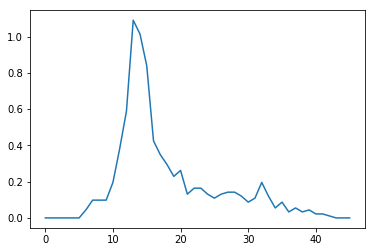

In [48]:
print("E (Energy) is a numpy array {}".format(E.shape))
sample_ndx = 722
E[sample_ndx,:]           # display the data
plt.plot(E[sample_ndx,:]) # view the data

In [34]:
f[sample_ndx,:]   # display the data

array([0.033, 0.038, 0.043, 0.048, 0.053, 0.058, 0.063, 0.068, 0.073,
       0.078, 0.083, 0.088, 0.093, 0.1  , 0.11 , 0.12 , 0.13 , 0.14 ,
       0.15 , 0.16 , 0.17 , 0.18 , 0.19 , 0.2  , 0.21 , 0.22 , 0.23 ,
       0.24 , 0.25 , 0.26 , 0.27 , 0.28 , 0.29 , 0.3  , 0.31 , 0.32 ,
       0.33 , 0.34 , 0.35 , 0.365, 0.385, 0.405, 0.425, 0.445, 0.465,
       0.485])

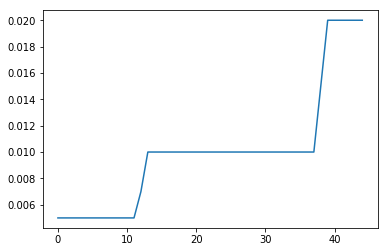

In [35]:
df = np.diff(f)
#plt.plot(df) # numpy differentiation is harsh
df[sample_ndx,:] # slice of one row
plt.plot(df[sample_ndx,:])

In [39]:
import pandas as pd
freq = pd.DataFrame(f)

p_df = freq.diff(axis=1,periods=1) # compare this element with the one next to it, along the 2nd dimension

In [41]:
print(type(p_df))
p_df.iloc[[1,2,3,sample_ndx]]
#plt.plot(p_df[[29]]) # pandas differentiation has curves

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
1,NaN,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.01,0.01,0.01,0.015,0.02,0.02,0.02,0.02,0.02,0.02
2,NaN,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.01,0.01,0.01,0.015,0.02,0.02,0.02,0.02,0.02,0.02
3,NaN,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.01,0.01,0.01,0.015,0.02,0.02,0.02,0.02,0.02,0.02
722,NaN,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.01,0.01,0.01,0.015,0.02,0.02,0.02,0.02,0.02,0.02


In [65]:
pdE = pd.DataFrame(E)
np.mean(pdE, axis='columns')
print(pdE.shape)
pdE.iloc[[1,2,3,sample_ndx]]

# Emid = .5*(E(:,1:N-1)+E(:,2:N));
#Emid = np.zeros(len(E))
#for i in range(1,len(E)):
#    Emid[i-1] = .5*(E[i-1] + E[i])
#
#print("Emid is a {} with len:{}".format(type(Emid),len(Emid)))
#plt.plot(Emid)
# fmid = .5*(f(:,1:N-1)+f(:,2:N));

(1085, 46)


,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
1,0.0,0.0,0.0,0.000,0.018,0.055,0.061,0.079,0.115,0.170,...,0.006,0.006,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.012,0.019,0.037,0.056,0.142,0.234,0.290,...,0.006,0.012,0.006,0.006,0.000,0.000,0.000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000,0.000,0.016,0.073,0.163,0.179,0.179,...,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0
722,0.0,0.0,0.0,0.000,0.000,0.000,0.044,0.098,0.098,0.098,...,0.033,0.055,0.033,0.044,0.022,0.022,0.011,0.0,0.0,0.0


In [43]:
#fmid = np.zeros(len(f))
#for i in range(1,len(f)):
#    fmid[i-1] = .5*(f[i-1] + f[i])
#
#print("fmid is a {} with len:{}".format(type(fmid),len(fmid)))
#plt.plot(fmid)

In [44]:
#SWH = 4*sqrt(sum(df.*Emid,2));

---